# Data Exploration

## 1 Setup

In [4]:
import idstools
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

## 2 Import der Daten

In [5]:
data = pd.read_csv("../data/BikeRentalDaily_train.csv", sep=";", index_col=0).sort_index()
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.77,0.36,120.87,0.16,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.54,0.35,104.41,0.25,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.85,0.19,65.59,0.25,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.00,0.21,88.57,0.16,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.08,0.23,65.54,0.19,745,0,82,1518,1600


Im Folgenden sind die Datentypen der einzelnen Variablen im Datenset ersichtlich.

In [6]:
data.dtypes

dteday              object
season             float64
yr                   int64
mnth                 int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
leaflets             int64
price reduction      int64
casual               int64
registered           int64
cnt                  int64
dtype: object

## 3 Missing Value Handling

Mit Hilfe der folgenden Matrix ist schnell ersichtlich, in welchen Spalten und in welchem Umfang fehlende Werte vorliegen. Betroffen sind die Variablen "season" und "hum".

<Axes: >

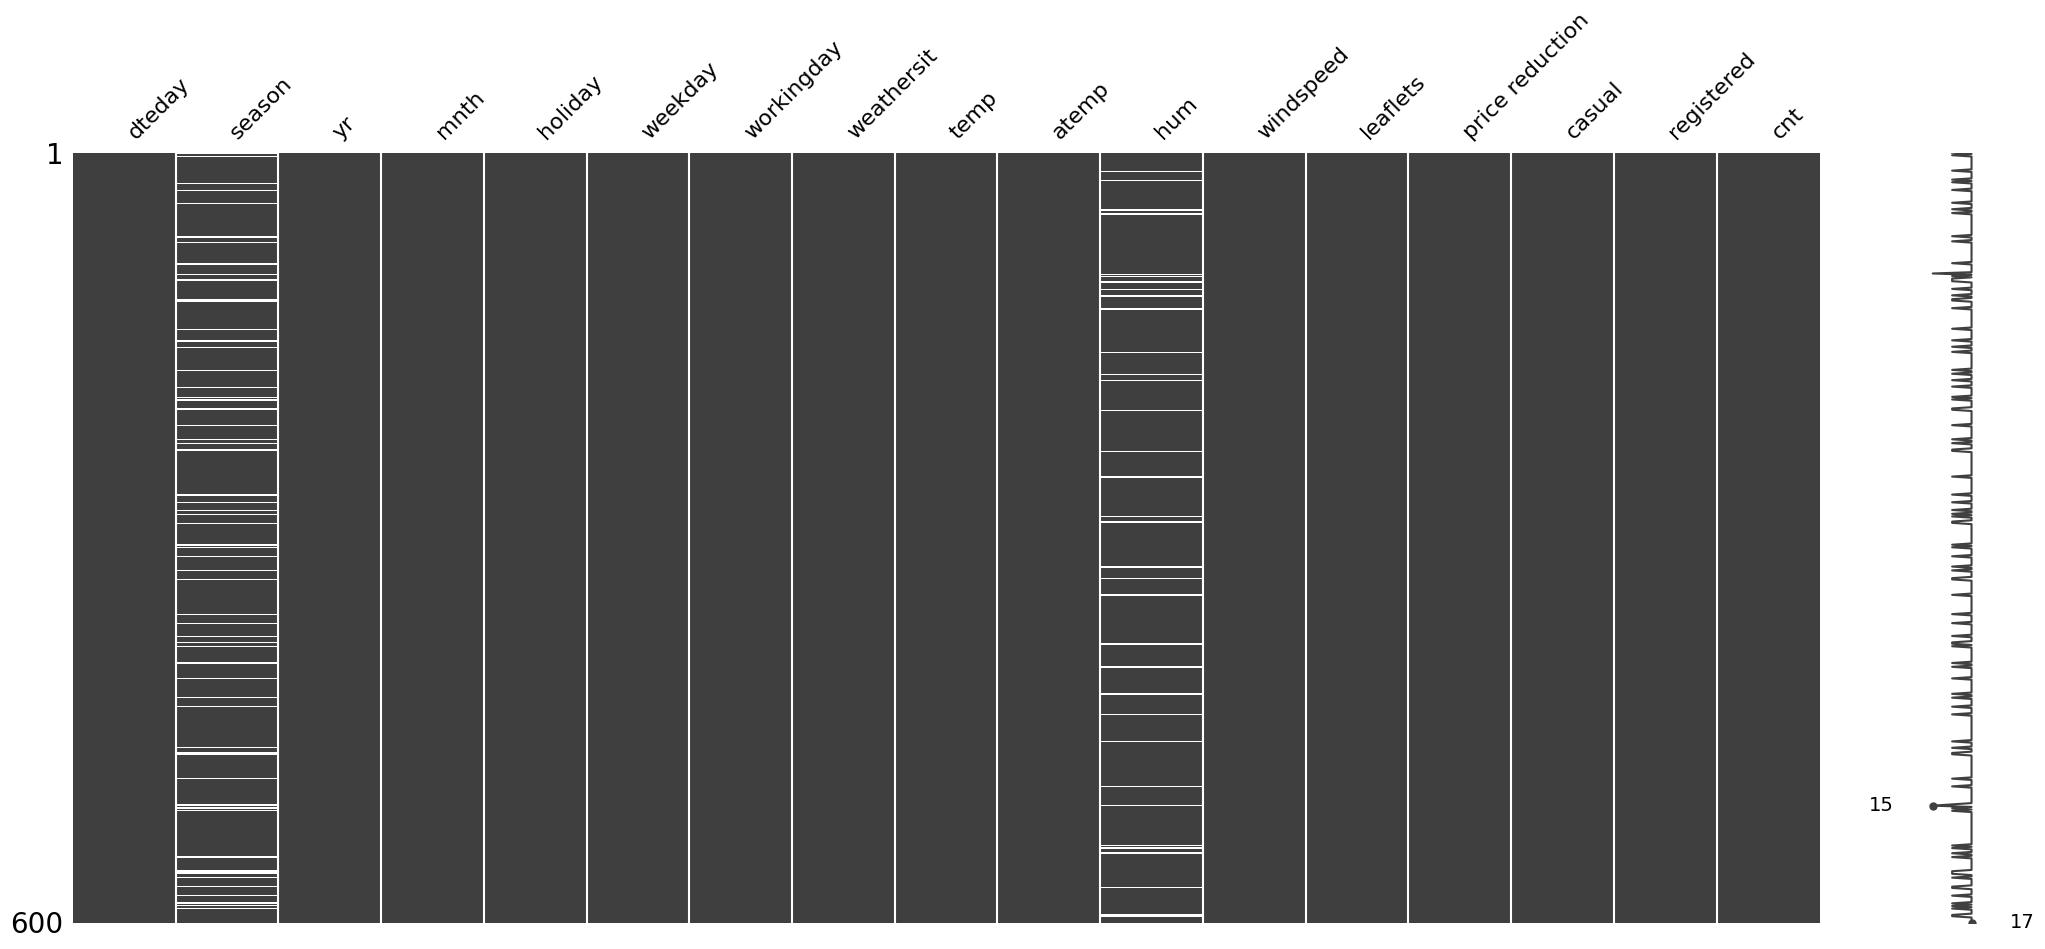

In [7]:
msno.matrix(data)

Die fehlenden Werte in der Spalte "season" werden anhand des vorliegenden Datums in der entsprechenden Zeile aufgefüllt. 

get_season_by_date bestimmt die Jahreszeit anhand eines Datums im Format "dd.mm". Sie verwendet das Modul time, um feste Zeitpunkte für den Beginn der Jahreszeiten (Frühling, Sommer, Herbst, Winter) festzulegen und vergleicht dann das eingegebene Datum mit diesen Zeitpunkten. Die Funktion gibt eine Ganzzahl zurück, die die entsprechende Jahreszeit repräsentiert (1 für Frühling, 2 für Sommer, 3 für Herbst, 4 für Winter). Beachte jedoch, dass die Funktion Schwierigkeiten mit dem 29. Februar haben könnte, wenn keine Jahreszahl angegeben ist, da sie die Schaltjahre nicht berücksichtigt.
Es gibt vier fest definierte Zeitpunkte für den Beginn jeder Jahreszeit (Frühling, Sommer, Herbst, Winter). Diese Zeitpunkte sind auf den 20. März, 20. Juni, 20. September und 20. Dezember festgelegt.

*Hat jemand von euch eine elegantere Lösung dafür?*

In [8]:
# datetime.datetime kann nicht mit 29. Feb umgehen, wenn keine Jahreszahl dabei ist
import time
def get_season_by_date(date: str):
    """Derive season by date"""
    dateformat = "%d.%m"

    # Season beginnings
    spring = time.strptime("20.03", dateformat)
    summer = time.strptime("20.06", dateformat)
    autumn = time.strptime("20.09", dateformat)
    winter = time.strptime("20.12", dateformat)

    date_p = time.strptime(date[:5], dateformat)

    if date_p < spring:
        return 1
    elif spring < date_p < summer:
        return 2
    elif summer < date_p < autumn:
        return 3
    elif autumn < date_p < winter:
        return 4
    else:
        return 1

In [9]:
def season_wrapper(row):
    row["season"] = get_season_by_date(row["dteday"])
    return row
data_new = data.apply(season_wrapper, axis=1)
data_new

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,6,0,2,13.77,0.36,120.87,0.16,755,0,331,654,985
2,02.01.2011,1,0,1,0,0,0,2,14.54,0.35,104.41,0.25,837,1,131,670,801
3,03.01.2011,1,0,1,0,1,1,1,7.85,0.19,65.59,0.25,829,0,120,1229,1349
4,04.01.2011,1,0,1,0,2,1,1,8.00,0.21,88.57,0.16,734,0,108,1454,1562
5,05.01.2011,1,0,1,0,3,1,1,9.08,0.23,65.54,0.19,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1,1,12,0,3,1,3,9.73,0.22,123.50,0.32,701,0,9,432,441
727,27.12.2012,1,1,12,0,4,1,2,10.17,0.23,97.94,0.35,561,0,247,1867,2114
728,28.12.2012,1,1,12,0,5,1,2,10.13,0.26,88.50,0.16,562,0,644,2451,3095


Fehlende Werte in der Spalte `hum` werden durch den Mittelwert ersetzt. (Wir können über andere Ersetzungswerte noch diskutieren!)

Hier wäre eventuell auch Regression Imputation möglich da "hum" und "weathersit" eine hohe Korrelation aufweisen. Vielleicht aber auch nur Zufall...

In [10]:
data_new["hum"].fillna(np.mean(data_new["hum"]), inplace=True)

<Axes: >

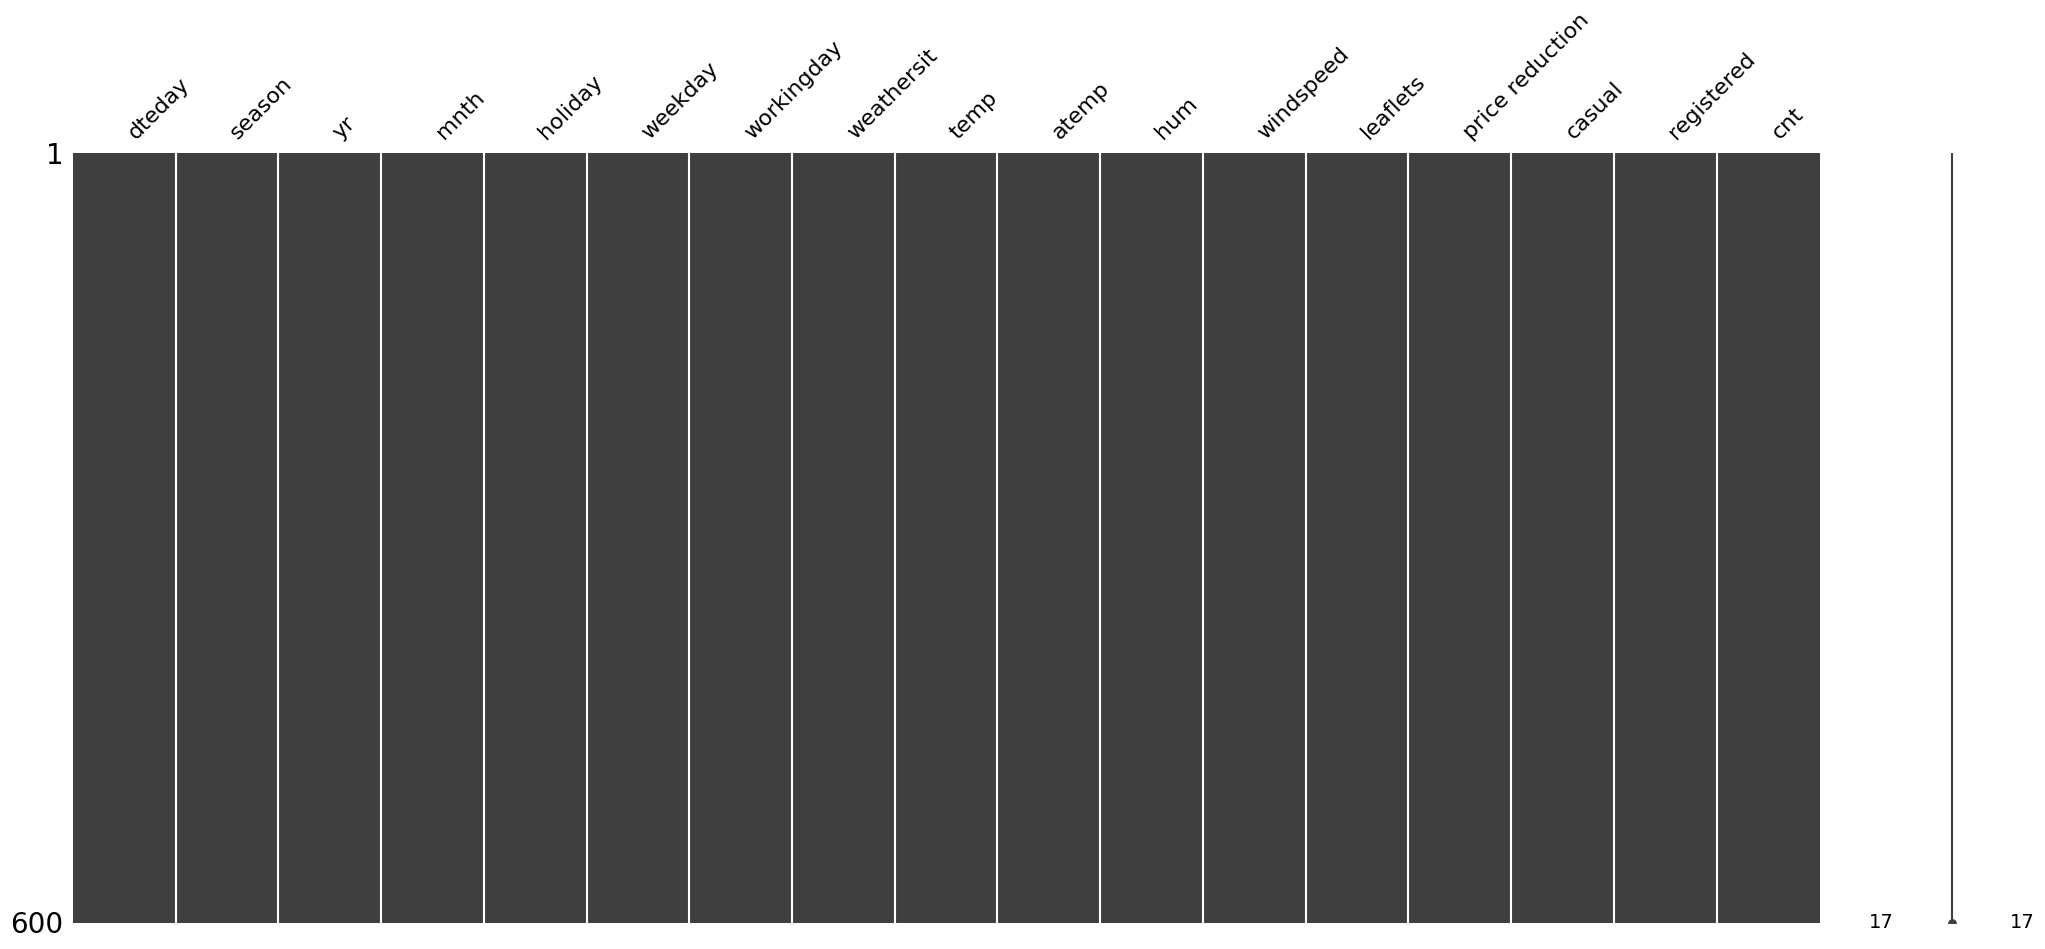

In [11]:
msno.matrix(data_new)

Wie in der Matrix ersichtlich, sind nun keine fehlenden Werte mehr im Datensatz vorhanden.

## 4 Descriptive Analysis

Wir nutzen die Describe-Methode, um einen ersten Überblick über die Struktur der numerischen Variablen zu erhalten. Hierbei wird eine Zusammenfassung zu den wichtigsten statistischen Kennzahlen erstellt.

In [12]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
season,600.0,2.44,1.12,1.00,1.00,2.00,3.00,4.00
yr,600.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
mnth,600.0,6.47,3.44,1.00,4.00,6.00,9.00,12.00
holiday,600.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
weekday,600.0,2.93,2.08,-1.00,1.00,3.00,5.00,6.00
workingday,600.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weathersit,600.0,1.40,0.54,1.00,1.00,1.00,2.00,3.00
temp,600.0,19.81,7.21,2.37,13.57,20.10,26.06,34.47
atemp,600.0,0.47,0.16,0.08,0.34,0.49,0.61,0.83
hum,600.0,93.85,20.76,28.19,78.36,93.85,108.44,145.88


ANMERKUNG: Bei `atemp` `hum` & `windspeed` sind die Einheiten nicht bekannt.

Windspeed vermutlich in Meter pro Sekunde?
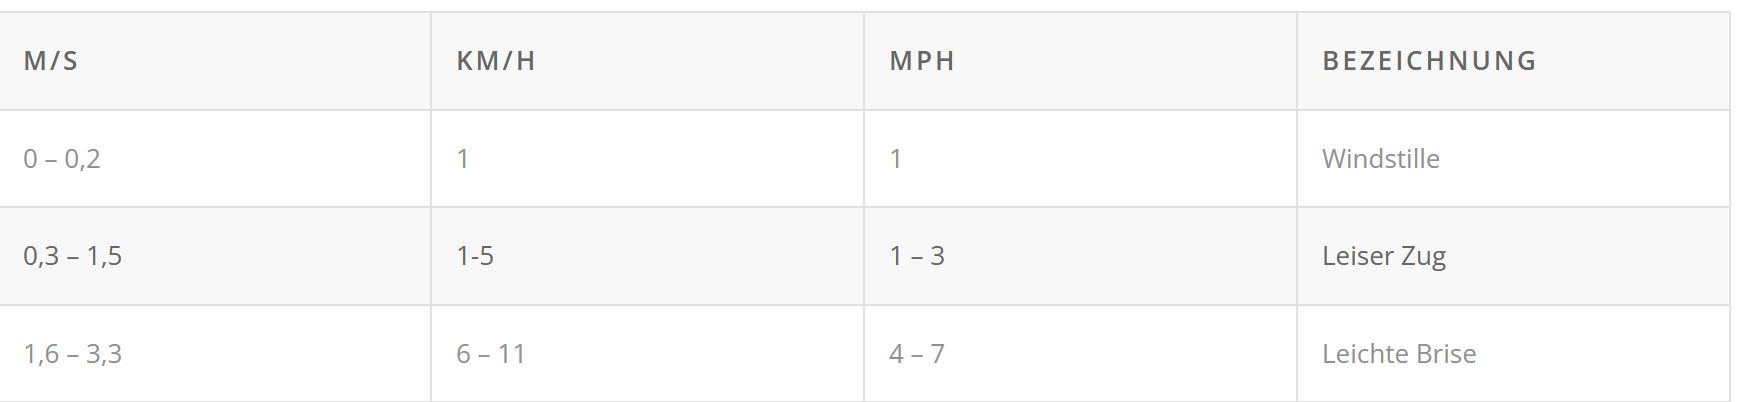
https://www.windinfo.eu/wettervorhersage/windskala-windrechner/

## 5 Data Corrections

Aus der deskriptiven Statistik ist ersichltich, dass das Minimum der Variable "windspeed" bei -1 liegt. Da die Windgeschwindigkeit nicht negativ sein kann, treffen wir die Annahme, dass es sich hierbei um Fehler handeln muss. Zunächst identifizieren wir hierfür die entsprechenden Zeilen.

In [13]:
negative_rows_windspeed = data[data['windspeed'] < 0].index

negative_rows_windspeed

Index([155, 197, 224, 236], dtype='int64', name='instant')

In [14]:
negative_rows = data.loc[data['windspeed'] < 0]

print(negative_rows)

             dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
155      04.06.2011     2.0   0     6        0        6           0   
197      16.07.2011     3.0   0     7        0        6           0   
224      12.08.2011     NaN   0     8        0        5           1   
236      24.08.2011     3.0   0     8        0        3           1   

         weathersit   temp  atemp    hum  windspeed  leaflets  \
instant                                                         
155               1  25.40   0.59  68.44       -1.0       624   
197               1  27.47   0.64  87.75       -1.0       731   
224               1  28.33   0.65  62.25       -1.0       835   
236               1  26.93   0.63  90.75       -1.0       935   

         price reduction  casual  registered   cnt  
instant                                             
155                    0    1869        3473  5342  
197                    

Im Anschluss entfernen wir die entsprechenden vier Zeilen aus dem Dataframe.

In [15]:
data = data.drop(negative_rows_windspeed)

Der Wochentag `-1` ist offensichtlich ein fehlender Wert, der ebenfalls behoben werden muss.

In [16]:
def get_wday_by_date(row):
    if row["weekday"] > 0:
        return row
    weekday_shift = { # week starts on Sunday in dataset
        6: 0,
        0: 1,
        1: 2,
        2: 3,
        3: 4,
        4: 5,
        5: 6
    }
    dateformat = "%d.%m.%Y"
    row["weekday"] = weekday_shift[time.strptime(row["dteday"], dateformat).tm_wday]
    return row
data_new = data_new.apply(get_wday_by_date, axis=1)

## 6 Outlier Detection and Handling

Es ist zu sehen, dass die Gesamtanzahl und die Zahl der nicht registrierten Nutzer einen sehr hohen Maximalwert haben. Die Gesamtzahl wird aus registrierten Nutzern + nicht registrierten Nutzern hergeleitet -> Die Outlier werden mittels der `casual` Spalte ermittelt.

In [17]:
from scipy import stats
zscores = stats.zscore(data_new["casual"])
thresh = 3.0
outliers = data_new[abs(zscores) > thresh]
outliers

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
448,23.03.2012,2,1,3,0,5,1,2,24.07,0.57,104.13,0.12,535,1,26150,5893,32043
505,19.05.2012,2,1,5,0,6,0,1,24.00,0.57,68.44,0.08,1030,0,38061,4884,42945
624,15.09.2012,3,1,9,0,6,0,1,24.33,0.59,75.25,0.25,820,0,30378,5554,35932
631,22.09.2012,4,1,9,0,6,0,1,26.00,0.61,97.00,0.28,963,0,47138,5883,53021


Diese Werte werden entfernt

In [18]:
data_no_out = data_new.drop(outliers.index, errors="ignore")

## 7 Exploratory Data Analysis and Relationships

Für die numerischen Variablen werden zunächst Boxplots erstellt. Diese bietet eine visuelle Darstellung der Verteilung, Zentralneigung und Streuung der Daten.

Text(0.5, 1.0, 'Numeric Variables 1')

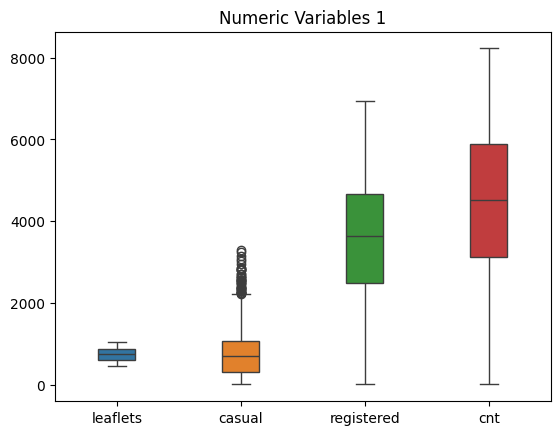

In [19]:
numeric_vars_large = ["leaflets", "casual", "registered", "cnt"]
sns.boxplot(data=data_no_out[numeric_vars_large], width=0.3)
plt.title("Numeric Variables 1")

Text(0.5, 1.0, 'Numeric Variables 2')

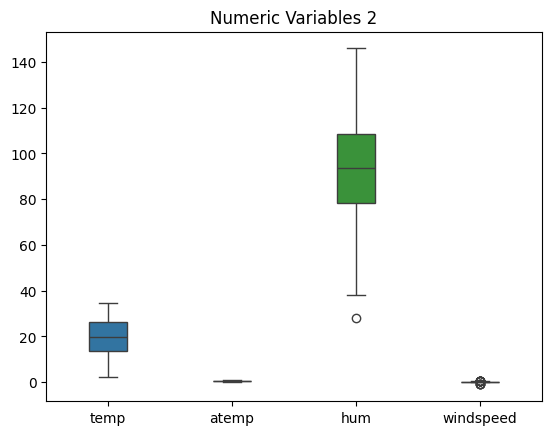

In [20]:
numeric_vars_small = ["temp", "atemp", "hum", "windspeed"]
sns.boxplot(data=data_no_out[numeric_vars_small], width=0.3)
plt.title("Numeric Variables 2")

Im Anschluss wollen wir einen Blick auf die kategorialen Variablen werfen und erstellen eine "Subplot-Matrix" von Kreisdiagrammen. So lässt sich bereits auf den ersten Blick die Verteilung der verschiedenen Kategorien für mehrere kategoriale Variablen visualisieren, um Muster oder Trends zu identifizieren.

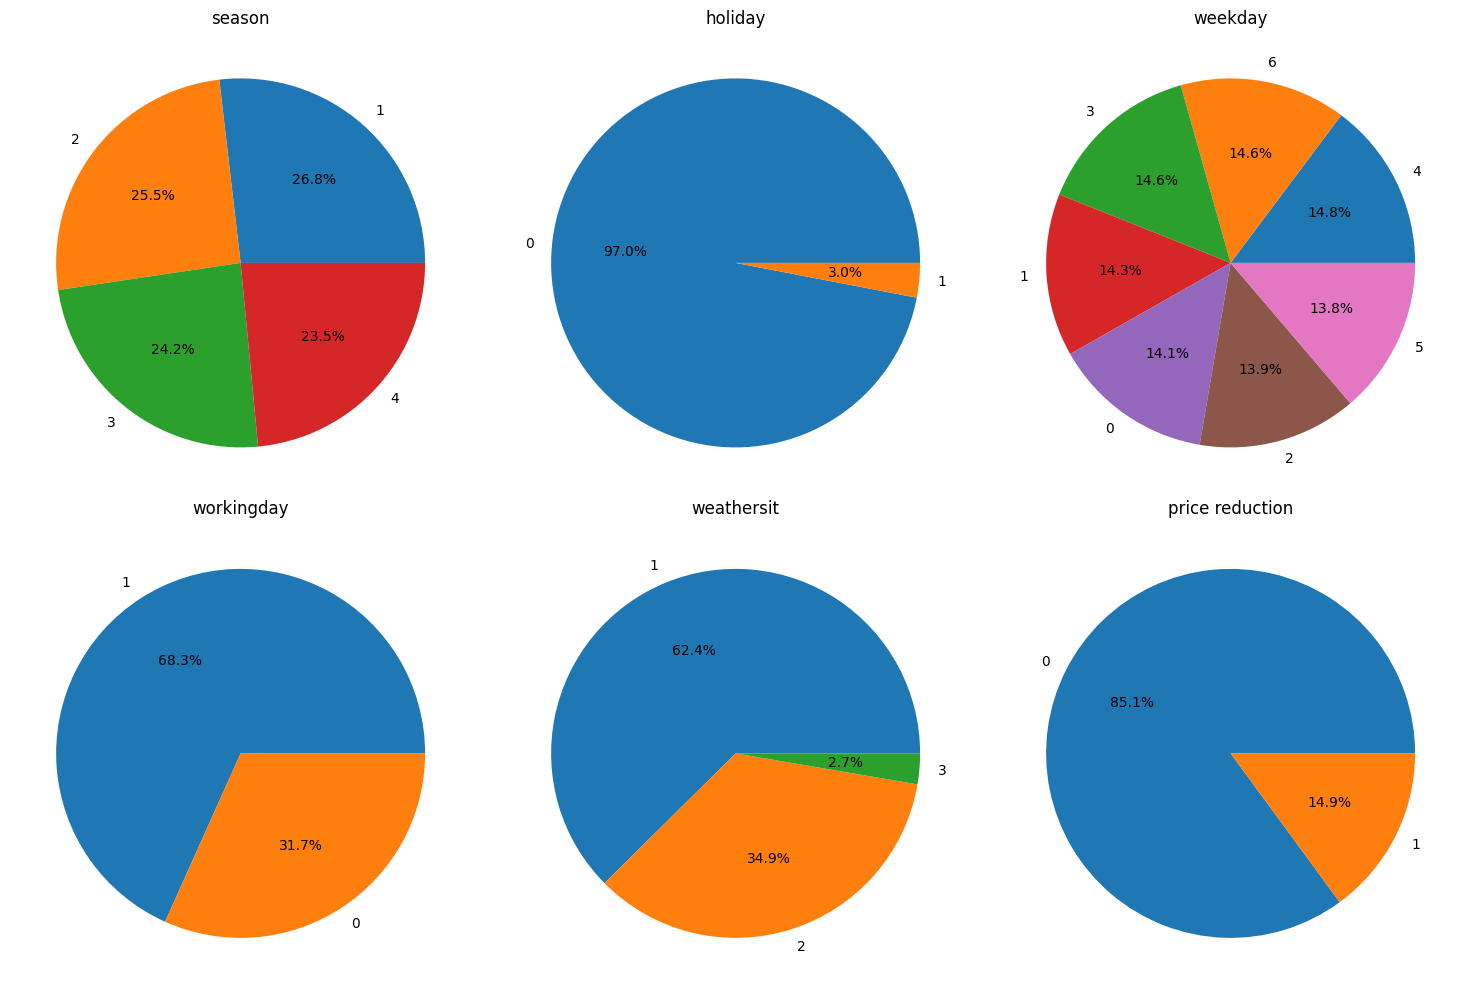

In [21]:
plt.figure(figsize=(15, 10))
features = ["season", "holiday", "weekday", "workingday", "weathersit", "price reduction"]
for i, var in enumerate(features, 1):
    v_counts = data_no_out[var].value_counts()
    plt.subplot(2, 3, i)
    plt.pie(x=v_counts, labels=v_counts.index, autopct='%1.1f%%')
    plt.title(var)

plt.tight_layout()
plt.show()

**Erkenntnisse:**

- Season: Anzahl verliehener Fahrräder über die Jahreszeiten eher gleichmäßig verteilt
- Holiday: Fahrräder werden eher an nicht an Feiertagen verliehen? Eventuell liegt es auch daran, dass es einfach weniger Feiertage gibt?
- Weekday: Anzahl verliehener Fahrräder über die Wochentage eher gleichmäig verteilt
- Workingday: Auch hier eventuell einfach mehr Werktage als Nicht-Werktage
- Weathersit: Fahrräder werden eher an Tagen mit Weathersit 1 und 2 verliehen, sprich an klaren oder wenig bewölten Tagen (1) oder an nebelig, bwölkten Tagen (2)
- Price Reduction: Seltener Aktionen für Preisreduzierungen?


1 = Clear, Few clouds, Partly cloudy, Partly cloudy

2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

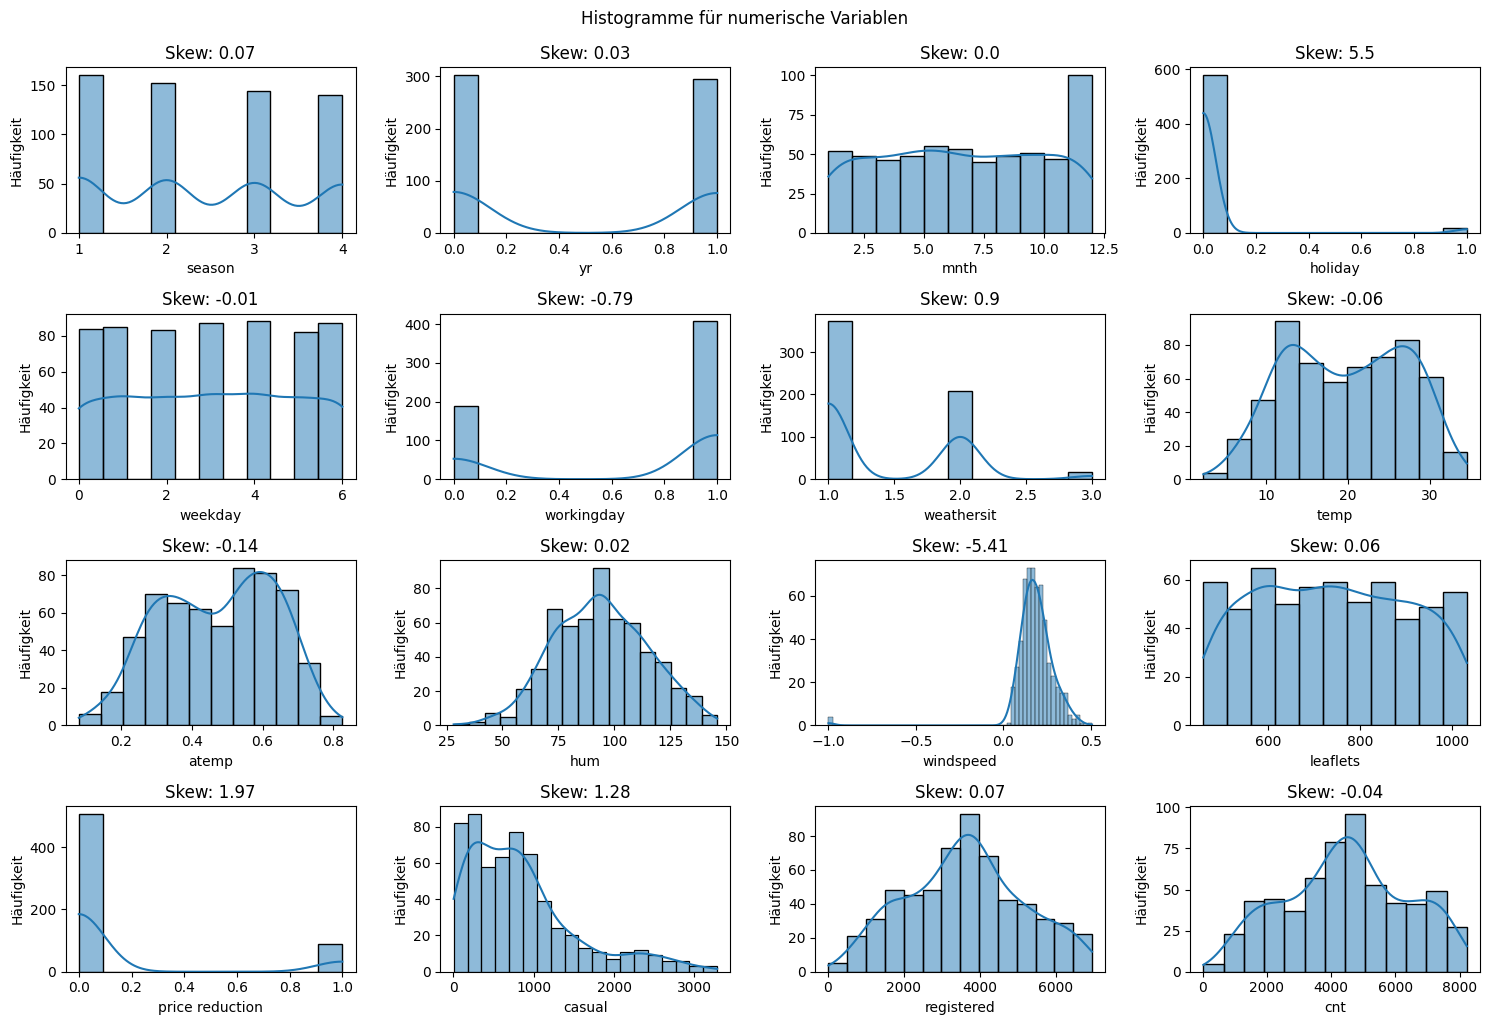

In [22]:
plt.figure(figsize=(15, 10))
features = [f for f in data_no_out.columns.tolist() if f not in ["dteday"]]
for i, var in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_no_out[var], kde=True)
    plt.title(f"Skew: {round(data_no_out[var].skew(), 2)}")
    plt.xlabel(var)
    plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.suptitle("Histogramme für numerische Variablen", y=1.02)
plt.show()

Um einen ersten Überblick über die Zusammenhänge zwischen den verschiedenen numerischen Variablen und der Response Variable "cnt" zu erhalten, werden Scatterplots erstellt. Muster, wie beispielsweise lineare Beziehungen, Trends und Ausreißer, können so schnell identifiziert werden.

In [23]:
alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['cnt'],
    column=numeric_vars_large + numeric_vars_small
).interactive()

alt.RepeatChart(...)

Im Folgenden werden die Korrelationskoeffizienten zwischen den numerischen Variablen und "cnt" berechnet. Je höher der Korrelationskoeffizient, desto stärker die lineare Beziehung zwischen den Variablen. Ein positiver Korrelationskoeffizient impliziert, dass wenn die Werte einer Variablen ansteigen, die Werte der anderen Variablen ebenfalls dazu tendieren anzusteigen. Bei negativen Korrelationskoeffizienten ist dies genau andersherum.

Die Variable "casual" weist die stärkste positiv lineare Beziehung mit einem Korrelationskoeffizient von 0,91 zur Variablen "cnt" auf. Auch die Variable "registered" könnte mit einem Korrelationskoeffizient von 0,58 für das weitere Vorgehen interessant sein.

In [24]:
selected_columns = numeric_vars_large + numeric_vars_small
corr_subset = data[selected_columns].corr()

sorted_corr_subset = corr_subset['cnt'].sort_values(ascending=False)

print(sorted_corr_subset)

cnt           1.00
casual        0.91
registered    0.58
atemp         0.38
temp          0.38
leaflets      0.03
hum          -0.08
windspeed    -0.14
Name: cnt, dtype: float64


Um einen Gesamtüberblick über die Korrelationskoeffizienten zwischen allen Variablen innerhalb unseres Datensatzes zu erhalten, erstellen wir eine Korrelationsmatrix. Durch die verbesserte Visualisierung mit Hilfe der Heatmap sind hohe Werte in den dunkleren Rot- bzw. Blautönen schnell ersichtlich.

<Axes: >

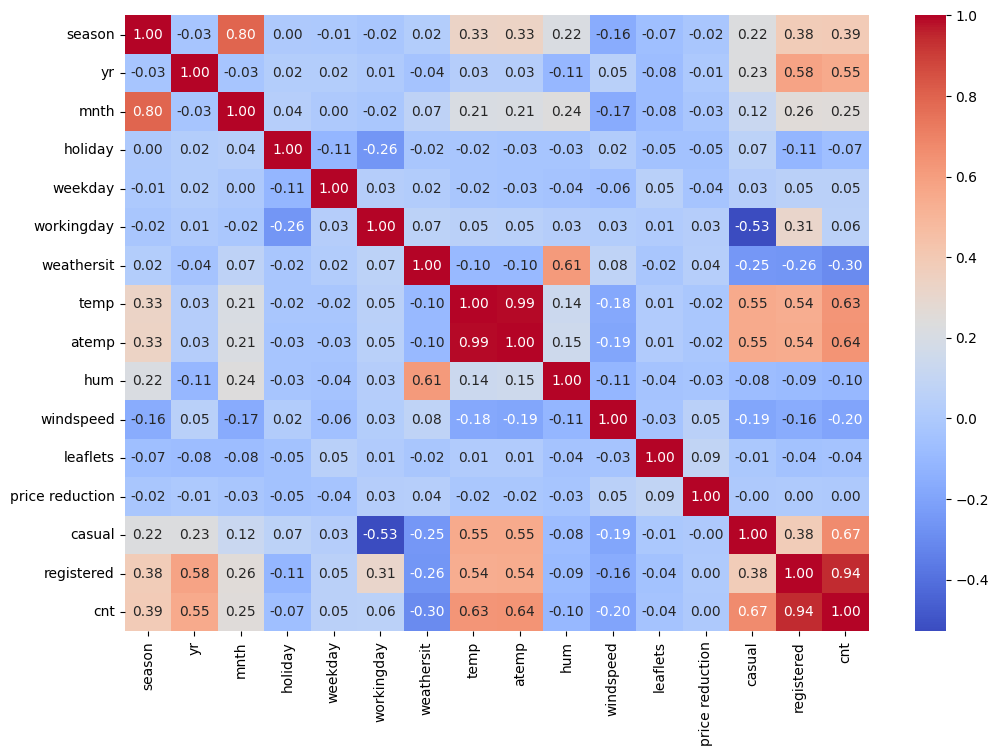

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_out.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")

## 8 Data Transformation

### Dummies / One Hot Encoding ###

In [26]:
data_d = pd.concat([data_no_out, pd.get_dummies(data_no_out["weekday"], prefix="weekday", dtype=int)], axis=1)
data_d = pd.concat([data_d, pd.get_dummies(data_no_out["weathersit"], prefix="weathersit", dtype=int)], axis=1)
data_d.drop(columns=["weekday", "weathersit"], inplace=True)

In [27]:
data_d

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,0,13.77,0.36,120.87,0.16,...,0,0,0,0,0,0,1,0,1,0
2,02.01.2011,1,0,1,0,0,14.54,0.35,104.41,0.25,...,1,0,0,0,0,0,0,0,1,0
3,03.01.2011,1,0,1,0,1,7.85,0.19,65.59,0.25,...,0,1,0,0,0,0,0,1,0,0
4,04.01.2011,1,0,1,0,1,8.00,0.21,88.57,0.16,...,0,0,1,0,0,0,0,1,0,0
5,05.01.2011,1,0,1,0,1,9.08,0.23,65.54,0.19,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1,1,12,0,1,9.73,0.22,123.50,0.32,...,0,0,0,1,0,0,0,0,0,1
727,27.12.2012,1,1,12,0,1,10.17,0.23,97.94,0.35,...,0,0,0,0,1,0,0,0,1,0
728,28.12.2012,1,1,12,0,1,10.13,0.26,88.50,0.16,...,0,0,0,0,0,1,0,0,1,0


### Scaling ###

In [28]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, output_distribution='normal',random_state=0)
data_tf = data_d.drop(columns=["dteday"])
data_tf = qt.fit_transform(data_tf)